**Importación de datos**

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
#Añadimos una columna para identificar de qué tienda es cada DataFrame
tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

#Unimos todos los DataFrames en uno solo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

#Calculamos los ingresos por tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostramos los ingresos
print("Ingreso por tienda: ")
print(f"Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Tienda 4: ${ingreso_tienda4:,.2f}")

# Creamos un diccionario para determinar la tienda con más ingresos
ingresos = {
    'Tienda 1': ingreso_tienda1,
    'Tienda 2': ingreso_tienda2,
    'Tienda 3': ingreso_tienda3,
    'Tienda 4': ingreso_tienda4
}

# Identificamos la tienda que más facturó
tienda_max = max(ingresos, key=ingresos.get)
monto_max = ingresos[tienda_max]

print(f"\n La tienda que más facturó fue {tienda_max} con un total de ${monto_max:,.2f}")

Ingreso por tienda: 
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

 La tienda que más facturó fue Tienda 1 con un total de $1,150,880,400.00


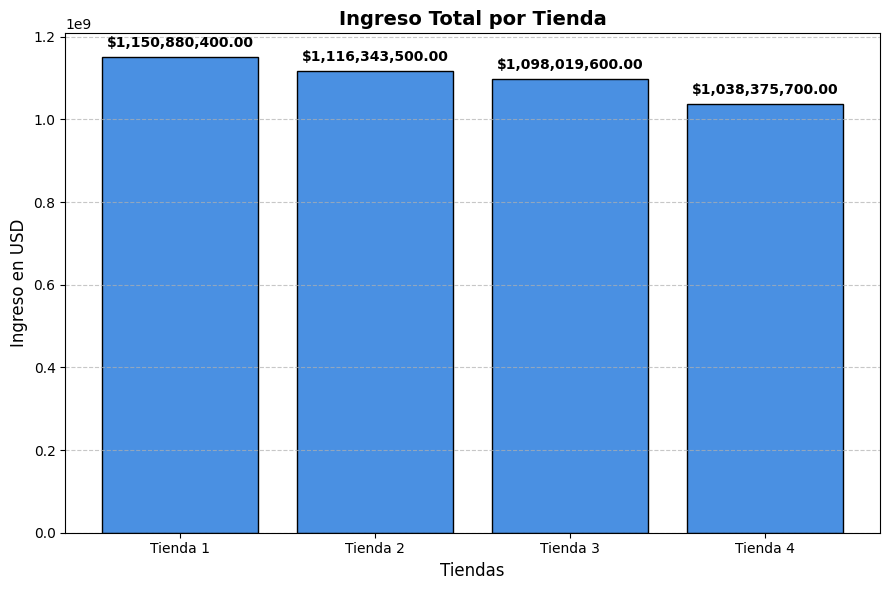

In [ ]:
import matplotlib.pyplot as plt

# Datos
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear la figura
plt.figure(figsize=(9, 6))
barras = plt.bar(nombres_tiendas, ingresos, color='#4A90E2', edgecolor='black')

# Título y etiquetas
plt.title('Ingreso Total por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingreso en USD', fontsize=12)

# Agregar etiquetas de valor encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'${altura:,.2f}',  # Formato con separador de miles y 2 decimales
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold', color='black')

# Mejoras de estilo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
#Creamos una funcion para determinar la cantidad de producto y sus categorias
def ventas_por_categoria(tienda):
    ventas_categoria = tienda['Categoría del Producto'].value_counts()
    cantidad_vendida = ventas_categoria.sum()

    detalle_categorias = "\n".join([f"    - {categoria}: {cantidad} productos" for categoria, cantidad in ventas_categoria.items()])

    categoria_mas_popular = ventas_categoria.idxmax()
    max_ventas = ventas_categoria.max()

    resumen = f"    * Categoría más popular: {categoria_mas_popular} ({max_ventas} productos)\n" \
              f"    * Ventas totales (todas las categorías): {cantidad_vendida} productos"

    return detalle_categorias, resumen


In [ ]:
# Diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Imprimir análisis por tienda
for nombre_tienda, tienda_df in tiendas.items():
    print(f"\n {nombre_tienda}")
    print("  Cantidad de productos vendidos por categoría:")

    detalle, resumen = ventas_por_categoria(tienda_df)
    print(detalle)
    print(resumen)


 Tienda 1
  Cantidad de productos vendidos por categoría:
    - Muebles: 465 productos
    - Electrónicos: 448 productos
    - Juguetes: 324 productos
    - Electrodomésticos: 312 productos
    - Deportes y diversión: 284 productos
    - Instrumentos musicales: 182 productos
    - Libros: 173 productos
    - Artículos para el hogar: 171 productos
    * Categoría más popular: Muebles (465 productos)
    * Ventas totales (todas las categorías): 2359 productos

 Tienda 2
  Cantidad de productos vendidos por categoría:
    - Muebles: 442 productos
    - Electrónicos: 422 productos
    - Juguetes: 313 productos
    - Electrodomésticos: 305 productos
    - Deportes y diversión: 275 productos
    - Instrumentos musicales: 224 productos
    - Libros: 197 productos
    - Artículos para el hogar: 181 productos
    * Categoría más popular: Muebles (442 productos)
    * Ventas totales (todas las categorías): 2359 productos

 Tienda 3
  Cantidad de productos vendidos por categoría:
    - Muebles: 

# 3. Calificación promedio de la tienda


In [ ]:
#Calculamos los datos para la valoracion
valoracion_tienda1 = tienda['Calificación'].mean()
valoracion_tienda2 = tienda2['Calificación'].mean()
valoracion_tienda3 = tienda3['Calificación'].mean()
valoracion_tienda4 = tienda4['Calificación'].mean()
print("Valoración media por tienda \n")
print(f"Valoración Tienda 1: {valoracion_tienda1:.2f}")
print(f"Valoración Tienda 2: {valoracion_tienda2:.2f}")
print(f"Valoración Tienda 3: {valoracion_tienda3:.2f}")
print(f"Valoración Tienda 4: {valoracion_tienda4:.2f}")

Valoración media por tienda 

Valoración Tienda 1: 3.98
Valoración Tienda 2: 4.04
Valoración Tienda 3: 4.05
Valoración Tienda 4: 4.00


In [ ]:
#Creamos funcion para la valoracion
valoracion_por_tienda = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Valoración por tienda': [valoracion_tienda1, valoracion_tienda2, valoracion_tienda3, valoracion_tienda4]
})
valoracion_ordenada = valoracion_por_tienda.sort_values('Valoración por tienda', ascending=True)
print("\nTiendas ordenadas por valoración (menor a mayor):")
print(valoracion_ordenada)



Tiendas ordenadas por valoración (menor a mayor):
     Tienda  Valoración por tienda
0  Tienda 1               3.976685
3  Tienda 4               3.995759
1  Tienda 2               4.037304
2  Tienda 3               4.048326


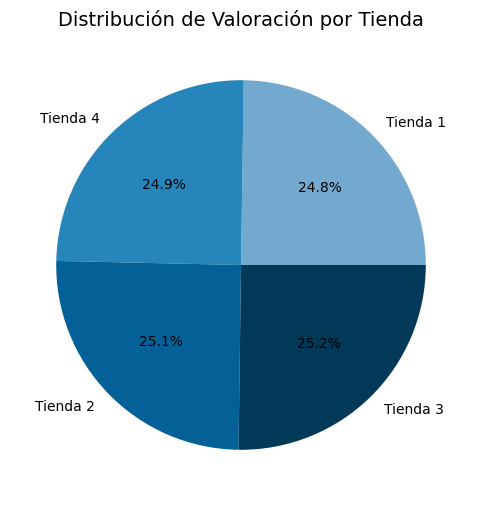

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(valoracion_ordenada['Valoración por tienda'],
        labels=valoracion_ordenada['Tienda'],
        autopct='%1.1f%%',
        colors=plt.cm.PuBu(np.linspace(0.5, 1, 4)))
plt.title('Distribución de Valoración por Tienda', fontsize=14)
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
#Creamos la funcion para los productos mas y menos vendidos
def visualizar_mas_y_menos_4_tiendas(tiendas_dict):
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
    fig.suptitle("Top 3 Más y Menos Vendidos por Tienda", fontsize=16, fontweight='bold')

    for idx, (nombre_tienda, df_tienda) in enumerate(tiendas_dict.items()):
        productos_mas, productos_menos = productos_mas_y_menos_vendidos(df_tienda)

        # Más vendidos
        axes[idx, 0].bar(productos_mas.index, productos_mas.values, color='green', alpha=0.7)
        axes[idx, 0].set_title(f'{nombre_tienda} - Más Vendidos', fontsize=12, fontweight='bold')
        axes[idx, 0].set_ylabel('Cantidad')
        axes[idx, 0].tick_params(axis='x', rotation=45)
        for i, v in enumerate(productos_mas.values):
            axes[idx, 0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

        # Menos vendidos
        axes[idx, 1].bar(productos_menos.index, productos_menos.values, color='red', alpha=0.7)
        axes[idx, 1].set_title(f'{nombre_tienda} - Menos Vendidos', fontsize=12, fontweight='bold')
        axes[idx, 1].set_ylabel('Cantidad')
        axes[idx, 1].tick_params(axis='x', rotation=45)
        for i, v in enumerate(productos_menos.values):
            axes[idx, 1].text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

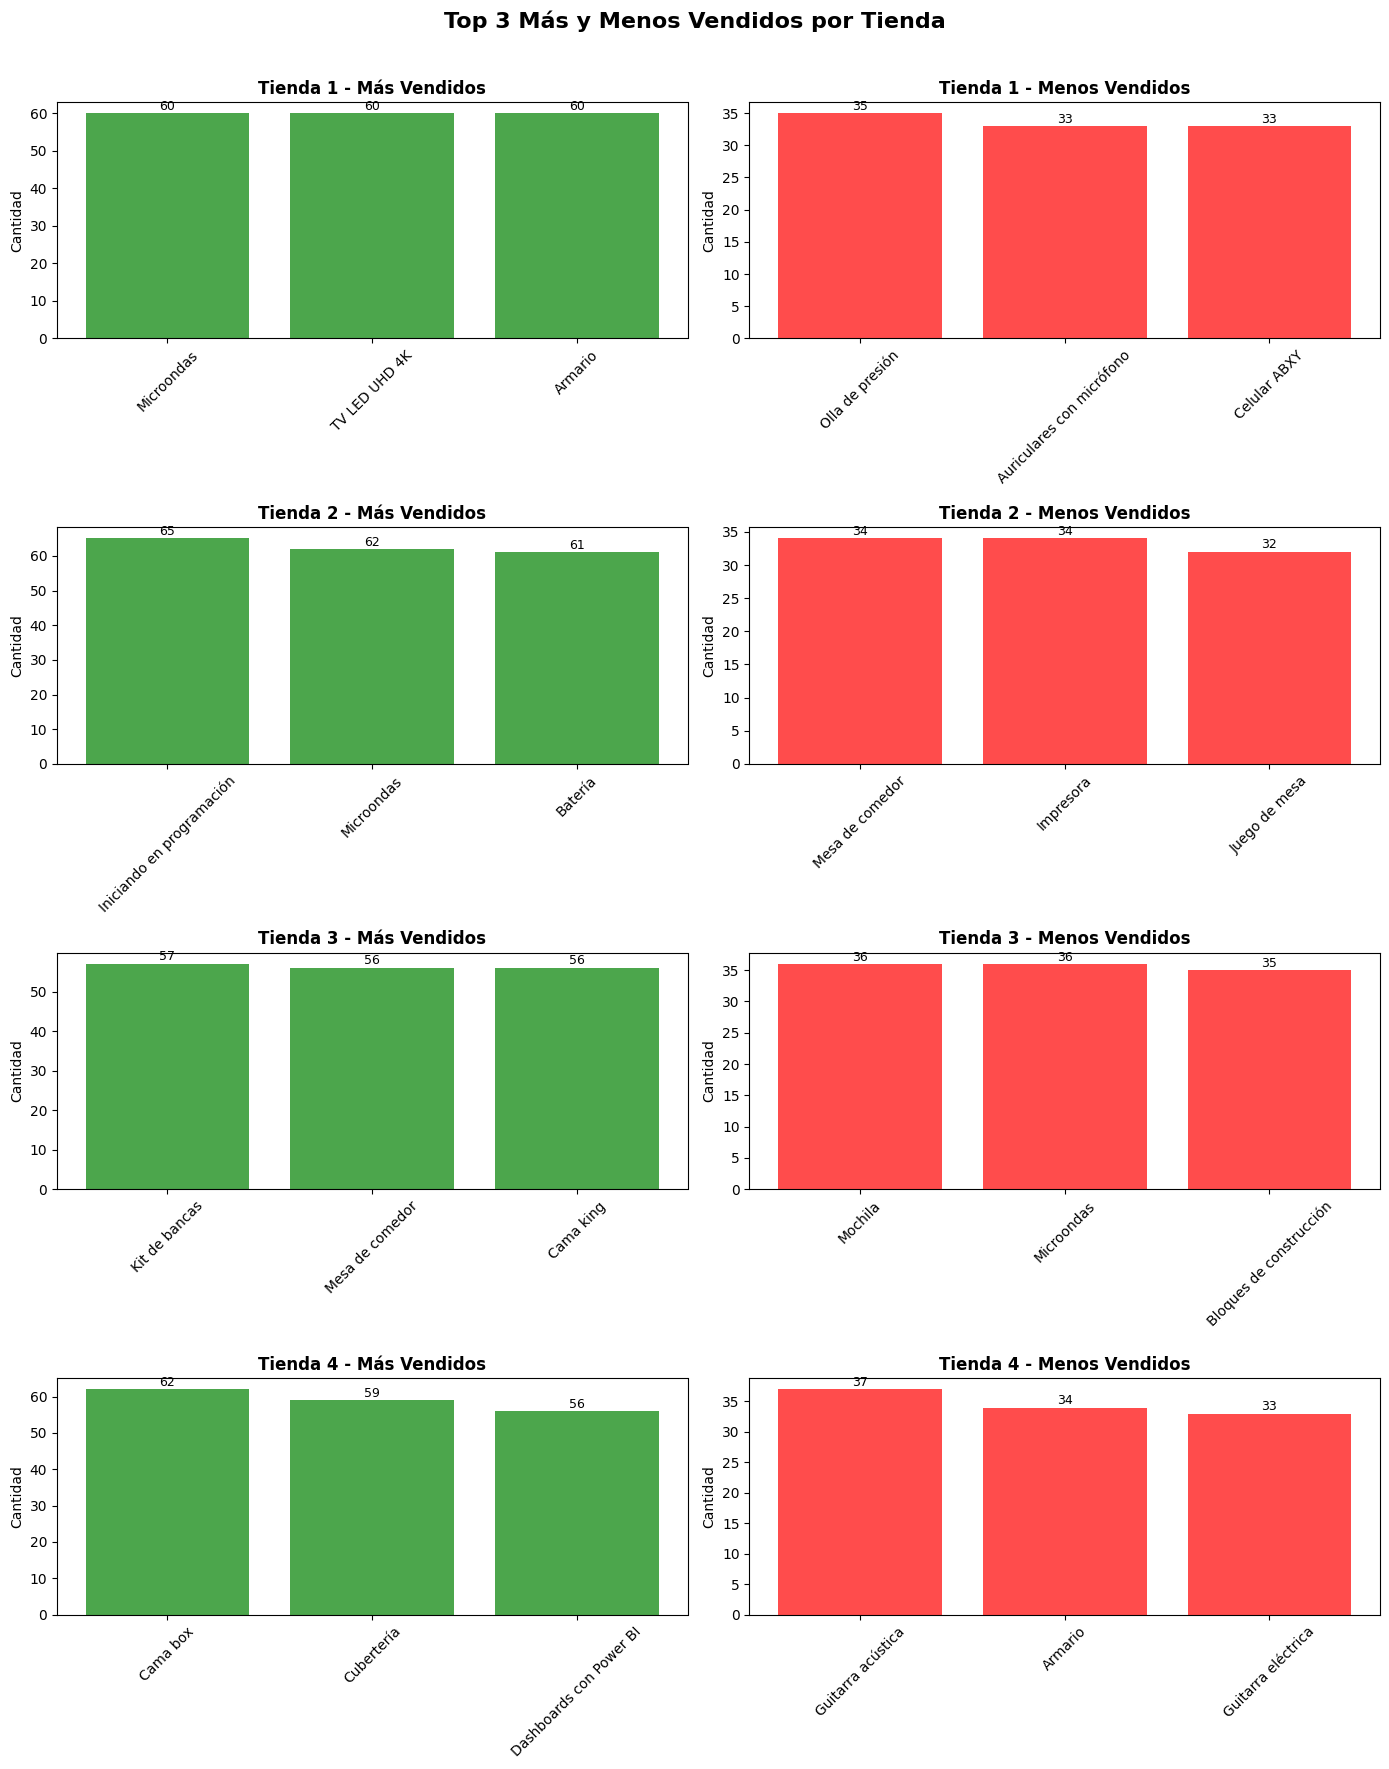

In [ ]:
# Llama la función con tus tiendas:
visualizar_mas_y_menos_4_tiendas({
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
})

# 5. Envío promedio por tienda

In [ ]:
#Calculamos los datos de envio por cada tienda
costo_envio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_tienda4 = tienda4['Costo de envío'].mean()

In [ ]:
#Imprimimos los valores
print("COSTO DE ENVÍO PROMEDIO POR TIENDA \n")
print(f"Costo de Envío Promedio Tienda 1: ${costo_envio_tienda1:.0f}")
print(f"Costo de Envío Promedio Tienda 2: ${costo_envio_tienda2:.0f}")
print(f"Costo de Envío Promedio Tienda 3: ${costo_envio_tienda3:.0f}")
print(f"Costo de Envío Promedio Tienda 4: ${costo_envio_tienda4:.0f}")

COSTO DE ENVÍO PROMEDIO POR TIENDA 

Costo de Envío Promedio Tienda 1: $26019
Costo de Envío Promedio Tienda 2: $25216
Costo de Envío Promedio Tienda 3: $24806
Costo de Envío Promedio Tienda 4: $23459


In [ ]:
#Creamos un fauncion para los costos de envio
costo_envio_por_tienda = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo de Envío Promedio': [costo_envio_tienda1, costo_envio_tienda2, costo_envio_tienda3, costo_envio_tienda4]
})
costo_envio_ordenado = costo_envio_por_tienda.sort_values('Costo de Envío Promedio', ascending=True)
print("\nTiendas ordenadas por costo de envío (menor a mayor):")
print(costo_envio_ordenado)


Tiendas ordenadas por costo de envío (menor a mayor):
     Tienda  Costo de Envío Promedio
3  Tienda 4             23459.457167
2  Tienda 3             24805.680373
1  Tienda 2             25216.235693
0  Tienda 1             26018.609580


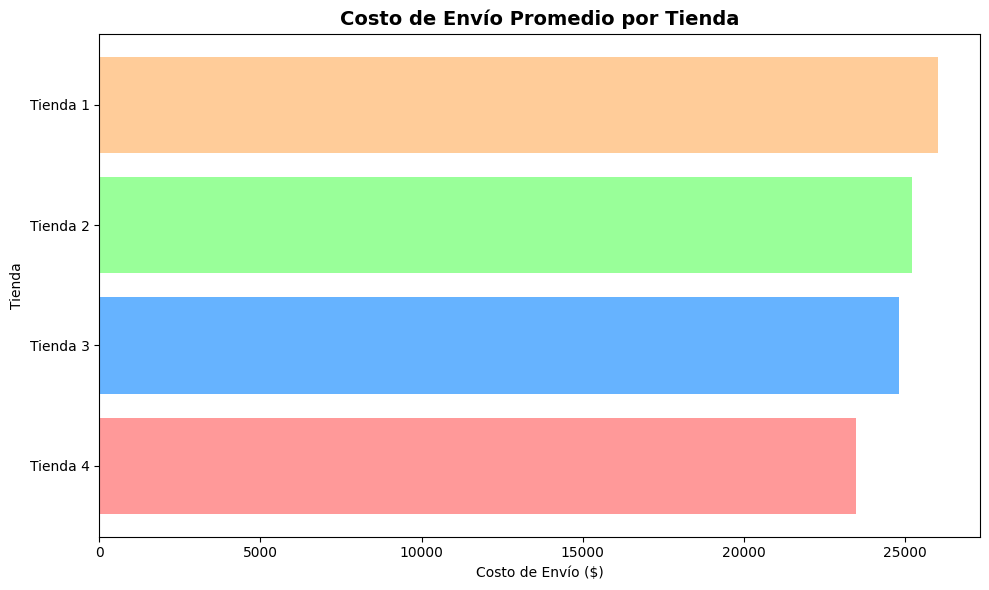

In [ ]:
#Visualizamos los datos obtenidos
plt.figure(figsize=(10, 6))
plt.barh(costo_envio_ordenado['Tienda'],
         costo_envio_ordenado['Costo de Envío Promedio'],
         color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

plt.title('Costo de Envío Promedio por Tienda',
          fontsize=14, fontweight='bold')
plt.xlabel('Costo de Envío ($)')
plt.ylabel('Tienda')
plt.tight_layout()
plt.show()

##Informe Final de Desempeño por Tienda

Con el objetivo de evaluar el rendimiento de las cuatro tiendas de la empresa, se realizó un análisis integral basado en distintos factores críticos: **facturación**, **ventas por categoría**, **productos más y menos vendidos**, **costo promedio de envío** y **calificación promedio de los clientes**.

Para ello, se utilizaron herramientas modernas de análisis de datos en Python, permitiendo extraer conclusiones precisas y visualmente interpretables. Este análisis tiene como finalidad determinar qué tienda presenta el mejor desempeño comercial y cuál podría requerir ajustes o incluso ser considerada para una posible venta.

---

## Análisis de Facturación

Cada tienda logró ingresos superiores a los 1,000 millones, reflejando un volumen de ventas alto y relativamente parejo. Sin embargo, la **Tienda 1** se destaca como la **de mayor facturación**, superando en casi 120 millones a la Tienda 4.

Aunque la diferencia no es abrumadora, este indicador la posiciona como la más sólida financieramente. Las otras tiendas mantienen una facturación competitiva, lo que indica un entorno de ventas saludable en general.

---

##  Ventas por Categoría

El análisis muestra que en todas las tiendas, **"Muebles"** es la categoría más vendida. En contraste, categorías como **"Libros"**, **"Artículos para el hogar"** e **"Instrumentos musicales"** presentan niveles de ventas significativamente más bajos.

Un caso específico es la **Tienda 1**, donde los **artículos para el hogar** apenas alcanzan unas 171 unidades vendidas, cifra por debajo del promedio de las otras tiendas. Este dato sugiere la necesidad de estrategias promocionales, descuentos o incentivos como envíos gratuitos, con el objetivo de aumentar la demanda en esas categorías menos dinámicas.

---

##  Calificación Promedio por Tienda

La satisfacción del cliente, medida a través de calificaciones promedio, revela que **la Tienda 1 y la Tienda 4** presentan los valores más bajos, ambas por debajo de 4 puntos. La **Tienda 1**, en particular, muestra la **calificación más baja (3.98)**.

Este resultado podría estar vinculado a deficiencias en el servicio al cliente, experiencia de compra o cumplimiento en envíos. A pesar de tener un volumen de ventas considerable, una calificación baja podría afectar la fidelización de clientes y el crecimiento a largo plazo.

---

##  Productos Más y Menos Vendidos

En cuanto a los productos más vendidos, se observa una tendencia común entre tiendas, destacándose artículos como **"Cama box"**, **"Kit de bancas"** y **"Iniciando en programación"**. Los productos menos vendidos varían entre **"Guitarra acústica"**, **"Mochila"** y otros artículos de menor rotación.

Aunque la mayoría de tiendas comparten productos similares en el top de ventas, **la Tienda 3** presenta una pequeña variación en sus productos más vendidos, mostrando una **diversificación más marcada** respecto a las otras.

---

##  Costo de Envío Promedio por Tienda

El gráfico muestra que la **Tienda 1** tiene el **mayor costo promedio de envío** con un valor aproximado de **\$26,018**, superior al de las demás tiendas. Esta diferencia puede influir negativamente tanto en la decisión de compra de los clientes como en su nivel de satisfacción, lo que podría estar relacionado con la baja calificación observada previamente.

Reducir estos costos o implementar promociones con envío gratuito podría ser una estrategia efectiva para mejorar los resultados generales.

---

##  Conclusión Final

En base al análisis realizado, se concluye que la **Tienda 1** presenta el desempeño más débil en términos de satisfacción del cliente, costos de envío y ventas en ciertas categorías específicas. A pesar de esto, tiene productos competitivos dentro del top de ventas y mantiene una facturación considerable, lo que indica que aún existen oportunidades de mejora.

Si la estrategia actual apunta a vender una de las tiendas, la Tienda 1 sería la candidata más lógica. Sin embargo, si el objetivo es **optimizar su rendimiento**, aplicar acciones correctivas como mejorar la experiencia del cliente, reducir costos logísticos y aplicar campañas de promoción segmentadas podría revertir su situación con relativa facilidad.

---
